<a href="https://colab.research.google.com/github/DechiWords/Mathematic_and_Statistics/blob/main/Funciones_Estadisticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Información previa

Las fórmulas son dadas en el siguiente libro.

Miller, I. Miller, M. Freund, J. (2000). *Estadística matemática con aplicaciones* (6a. ed.). PEARSON EDUCACIÓN.

[ESTADÍSTICA MATEMÁTICA CON APLICACIONES][1]

[1]: https://books.google.com.pe/books?id=1ffwJNjZWxsC&printsec=copyright&hl=es#v=onepage&q&f=false

En el siguiente link usted podrá visualizar las tablas estadísticas de referencia, estos valores, en particular de la distribución normal, $t$ de student, $\chi^2$ y $F$ de Fisher, son de gran interés para la resolución de ciertas formulas.

[TABLAS ESTADÍSTICAS][2]

[2]: http://verso.mat.uam.es/~pablo.fernandez/tablas_ProbI_2007-2008.pdf

Nosotros nos centraremos en este COLAB en la cola derecha de la curva de distribución.

La librería de Python que nos ayudará a obtener estos valores es **scipy.stats**. En el siguiente link se encuentra la información de dicha librería.

[scipy.stats][3]

[3]: https://docs.scipy.org/doc/scipy/reference/stats.html

La librería de Python que nos ayudará con calculos estadísticos como la media poblacional, muestra, etc. es la librería **statistics**. En el siguiente link se enuentra la información de dicha librería.

[statistics][4]

[4]: https://docs.python.org/3/library/statistics.html

***NOTA***

Las funciones presentadas en este cuaderno tienen como finalidad un uso educativo más que industrial pues existen paqueterías en Python que realizan estos trabajos de manera óptima. Sin embargo, estas mismas pueden ser modificadas por un Científico de Datos y ayudar a la optimización computacional de las mismas.

#Intervalos de confianza

## Intervalo de confianza

Una estimación de intervalo de $\theta$ es un intervalo de la forma

$$\hat{\theta}_1 < \theta < \hat{\theta}_2$$

Donde $\hat{\theta}_1$ y $\hat{\theta}_2$ son valores de variables aleatorias apropiadas. Por 'Apropiada' queremos decir que

$$P\left( \hat{\theta}_1 < \theta < \hat{\theta}_2 \right) = 1 - \alpha$$

Para alguna probabilidad especificada $1-\alpha$.

Para un valor especificado de $1-\alpha$ nos referimos a

$$\hat{\theta}_1 < \theta < \hat{\theta}_2$$

como **intervalo de confianza** de $(1-\alpha)100 \%$ para $\theta$.

Llamamos **grado de confianza** a $1-\alpha$.

Llamamos **límites de confianza** a $\hat{\theta}_1$ y $\hat{\theta}_2$.

Por ejemplo, sí deseamos un intervalo de confianza del $95\%$ tenemos que

$$\implies 1-\alpha = 0.95 \implies \alpha = 0.05$$

## Intervalo de confianza para la media de una muestra aleatoria de tamaño $n$

Sea $\bar{x}$ la media de una muestra aleatoria de tamaño $n$. 

Sí $n\geq 30$ o $\sigma^2$ es conocida entonces el intervalo de confianza para la media es

$$\bar{x}-z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}<\mu <\bar{x}+z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$

Sí $n\leq 29$ y $\sigma^2$ es desconocida entonces el intervalo de confianza para la media es

$$\bar{x}-t_{\frac{\alpha}{2},n-1}\frac{s}{\sqrt{n}}<\mu <\bar{x}+t_{\frac{\alpha}{2},n-1}\frac{s}{\sqrt{n}}$$

Con un margen de error de 

$$e = z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$$

Tamaño de muestra necesario para estimar $\mu$ de 

$$n = \left(\frac{z_{\frac{\alpha}{2}}\cdot \sigma}{e}\right)^2$$

In [ ]:
def IC_1_Media_Datos_Conocidos (Media,Desviacion,Alpha,n,Varianza_Poblacional):
  '''
  Media : Recibe el valor de la media de una muestra aleatoria.

  Desviacion : El valor de la desviacion, si la varianza poblacional es conocida
  entonces el valor ingresado es el raiz de la varianza poblacional. Si la varianza
  poblacional es desconocida entonces el valor ingresado es el valor de la desviacion
  de la muestra.

  n : Longitud de la muestra.

  Alpha : Probabilidad deseada. Este es un valor entre 0 y 1.

  Varianza_Poblacional : Es un valor booleano. True si la varianza poblacional
  es conocida, False en caso contrario.

  return.

  Una lista donde el primer elemento es el la cota inferior del intervalo de confianza,
  el segundo elemento es la cota superior del intervalo de confianza y el tercer
  elemento es un string que engloba el intervalo de confianza.
  '''
  from scipy.stats import norm,t
  from math import sqrt
  Z = norm.isf(Alpha/2)
  t_v = t.isf(Alpha/2,n-1)
  Div = Desviacion/sqrt(n)
  if Varianza_Poblacional == True or n>=30:
    Izq = Media - Z*Div
    Der = Media + Z*Div
    return [Izq,Der,str(Izq)[0:8]+' <M< '+str(Der)[0:8]]
  elif Varianza_Poblacional == False and n<=29:
    Izq = Media - t_v*Div
    Der = Media + t_v*Div
    return [Izq,Der,str(Izq)[0:8]+' <M< '+str(Der)[0:8]]

**EJEMPLO**

Ejemplo 11.1 del libro.

In [ ]:
IC_1_Media_Datos_Conocidos(64.3,15,0.025*2,20,True)[2]

'57.72608 <M< 70.87391'

In [ ]:
def IC_1_Media_Datos_Desconocidos (Data,Alpha,Varianza_Poblacional):
  '''
  Data : Es una lista que contiene los datos de la muestra.

  Alpha : Probabilidad deseada. Este es un valor entre 0 y 1.

  Varianza_Poblacional : Es un valor booleano. True si la varianza poblacional
  es conocida, False en caso contrario.

  return.

  Una lista donde el primer elemento es el la cota inferior del intervalo de confianza,
  el segundo elemento es la cota superior del intervalo de confianza y el tercer
  elemento es un string que engloba el intervalo de confianza.
  '''
  from scipy.stats import norm,t
  from math import sqrt
  from statistics import mean, stdev
  Media = mean(Data)
  n = len(Data)
  Z = norm.isf(Alpha/2)
  t = t.isf(Alpha/2,n-1)
  if Varianza_Poblacional == True:
    Varianza = float(input('Ingresa el valor de la varianza poblacional : '))
    Desviacion = sqrt(Varianza)
    Izq = Media - Z*(Desviacion/sqrt(n))
    Der = Media + Z*(Desviacion/sqrt(n))
    return [Izq,Der,str(Izq)[0:8]+' <M< '+str(Der)[0:8]]
  elif n>= 30:
    Desviacion = stdev(Data) #DESVIACION MUESTRAL
    Izq = Media - Z*(Desviacion/sqrt(n))
    Der = Media + Z*(Desviacion/sqrt(n))
    return [Izq,Der,str(Izq)[0:8]+' <M< '+str(Der)[0:8]]
  else: 
    Desviacion = stdev(Data) #DESVIACION MUESTRAL
    Izq = Media - t_v*(Desviacion/sqrt(n))
    Der = Media + t_v*(Desviacion/sqrt(n))
    return [Izq,Der,str(Izq)[0:8]+' <M< '+str(Der)[0:8]]

**EJEMPLO**

Ejemplo 11.3 del libro

In [ ]:
Data = [17,13,18,19,17,21,29,22,16,28,21,15,26,23,24,20,8,17,17,21,32,18,25,22,16,10,20,22,19,14,30,22,12,24,28,11]
IC_1_Media_Datos_Desconocidos(Data,0.025*2,False)[2]

'18.04359 <M< 21.78973'

## Intervalo de confianza para diferencia de medias

Sean $n_1,n_2$ dos muestras aleatorias de tamaño $n_1,n_2$ de dos poblaciones normales con varianzas conocidas $\sigma_1^2, \sigma_2^2$.

El intervalo de confianza para $\mu_1 - \mu_2$ es : 

Sí $n_1, n_2$ son mayores o iguales a 30 o tenemos que $\sigma_1^2$ y $\sigma_2^2$ son conocidas

$$\left(\bar{x_1}-\bar{x_2}\right)\pm z_{\frac{\alpha}{2}}\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}$$

Sí $n_1, n_2$ son menores o iguales a 29 y las varianzas $\sigma_1^2,\sigma_2^2$ son desconocidas pero iguales

$$\left(\bar{x_1}-\bar{x_2}\right)\pm t_{\frac{\alpha}{2},n_1+n_2-2}\cdot S_p\cdot \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$$

Donde

$$S_p = \sqrt{\frac{(n_1-1)\cdot s_1^2+(n_2-1)\cdot s_2^2}{n_1+n_2-2}}$$

Para determinar si las varianzas poblacionales son iguales, aun siendo desconocidas, hay que verificar el intervalo de confianza para la razón de dos varianzas. Sí el 1 está en el intervalo entonces las varianzas son iguales aun siendo desconocidas y, por tanto es matemáticamente correcto proceder por el segundo método.

In [ ]:
def IC_2_Media_Datos_Conocidos (Media_1,Varianza_1,n_1,Media_2,Varianza_2,n_2,Alpha,Varianza_Poblacional):
  '''
  Media_1 : El valor de la media de la primer poblacion

  Media_2 : El valor de la media de la segunda poblacion

  Varianza_1 : El valor de la varianza de la primer poblacion. Si la varianza de la poblacion es conocida
  entonces el valor ingresado es el valor de la varianza poblacional.

  Varianza_2 : El valor de la varianza de la segunda poblacion. Si la varianza de la poblacion es conocida
  entonces el valor ingresado es el valor de la varianza poblacional.

  n_1 : Longitud de la primer poblacion

  n_2 : Longitud de la segunda poblacion

  Alpha : Probabilidad deseada. Es un valor entre 0 y 1.

  Varianza_Poblacional : Es un valor booleano. True si las varianzas de las poblaciones son conocidas, False
  si son desconocidas pero iguales.

  return.

  Una lista que contiene 4 elementos. El primer elemento es la cota inferior del intervalo de confianza,
  el segundo elemento es la cota superior del intervalo de confianza, el tercer elemento es el intervalo de confianza
  y el cuarto elemento es la conclusion del intervalo de confianza.
  '''
  from scipy.stats import norm,t
  from math import sqrt
  Z = norm.isf(Alpha/2)
  t_v = t.isf(Alpha/2,n_1+n_2-2)
  if Varianza_Poblacional == True or (n_1 >= 30 and n_2 >= 30):
    Raiz = sqrt( (Varianza_1/n_1) + (Varianza_2/n_2) )
    Izq = (Media_1-Media_2) - Z*Raiz
    Der = (Media_1-Media_2) + Z*Raiz
    if Izq<0 and 0<Der:
      Mensaje = 'Media_1 = Media_2'
    elif Izq<0 and Der<0:
      Mensaje = 'Media_1 < Media_2'
    elif 0<Izq and 0<Der:
      Mensaje = 'Media_1 > Media_2'
    return [Izq,Der,str(Izq)[0:8]+' <M_1 - M_2< '+str(Der)[0:8],Mensaje]
  elif Varianza_Poblacional == False and (n_1 <= 29 and n_2 <= 29):
    S_p = S_p_Function(n_1,n_2,Varianza_1,Varianza_2)
    Raiz = sqrt( (1/n_1) + (1/n_2) )
    Izq = (Media_1-Media_2) - t_v*S_p*Raiz
    Der = (Media_1-Media_2) + t_v*S_p*Raiz
    if Izq<0 and 0<Der:
      Mensaje = 'Media_1 = Media_2'
    elif Izq<0 and Der<0:
      Mensaje = 'Media_1 < Media_2'
    elif 0<Izq and 0<Der:
      Mensaje = 'Media_1 > Media_2'
    return [Izq,Der,str(Izq)[0:8]+' <M_1 - M_2< '+str(Der)[0:8],Mensaje]

**EJEMPLO**

Los datos se obtuvieron del siguiente video: 

https://www.youtube.com/watch?v=vcV_-KSzy0M&t=45s

In [ ]:
#DATOS
Media_Sindicalizada = 20.75
Desviacion_Sindicalizada = 2.25
Longitud_Sindicalizada = 40
Media_No_Sindicalizada = 19.80
Desviacion_No_Sindicalizada = 1.90
Longitud_No_Sindicalizada = 45

#INTERVALO DE CONFIANZA
IC_2_Media_Datos_Conocidos(Media_Sindicalizada,(Desviacion_Sindicalizada)**2,Longitud_Sindicalizada,
                           Media_No_Sindicalizada,(Desviacion_No_Sindicalizada)**2,Longitud_No_Sindicalizada,
                           0.1,False)[2]

'0.202026 <M_1 - M_2< 1.697973'

In [ ]:
#CONCLUSION
IC_2_Media_Datos_Conocidos(Media_Sindicalizada,(Desviacion_Sindicalizada)**2,Longitud_Sindicalizada,
                           Media_No_Sindicalizada,(Desviacion_No_Sindicalizada)**2,Longitud_No_Sindicalizada,
                           0.1,False)[3]

'Media_1 > Media_2'

In [ ]:
def S_p_Function (n_1,n_2,V_1,V_2):
  from math import sqrt
  Numerador = (n_1-1)*V_1 + (n_2-1)*V_2
  Denominador = n_1 + n_2 - 2
  return sqrt(Numerador/Denominador)

def IC_2_Media_Datos_Desconocidos (Data_1,Data_2,Alpha,Varianza_Poblacional):
  '''
  Data_1 : Los datos de la primer poblacion.

  Data_2 : Los datos de la segunda poblacion.

  Alpha : Probabilidad deseada. Es un valor entre 0 y 1.

  Varianza_Poblacional : Es un valor booleano. True si las varianzas de las poblaciones son conocidas, False
  si son desconocidas pero iguales.

  return.

  Una lista que contiene 4 elementos. El primer elemento es la cota inferior del intervalo de confianza,
  el segundo elemento es la cota superior del intervalo de confianza, el tercer elemento es el intervalo de confianza
  y el cuarto elemento es la conclusion del intervalo de confianza.
  '''
  from scipy.stats import norm,t
  from math import sqrt
  from statistics import mean, variance
  n_1 = len(Data_1)
  n_2 = len(Data_2)
  Media_1 = mean(Data_1)
  Media_2 = mean(Data_2)
  Z = norm.isf(Alpha/2)
  t_v = t.isf(Alpha/2,n_1+n_2-2)
  if Varianza_Poblacional == True:
    Varianza_1 = float(input('Ingresa la varianza de la primer poblacion : '))
    Varianza_2 = float(input('Ingresa la varianza de la segunda poblacion : '))
    Raiz = sqrt( (Varianza_1/n_1) + (Varianza_2/n_2) )
    Izq = (Media_1-Media_2) - Z*Raiz
    Der = (Media_1-Media_2) + Z*Raiz
    if Izq<0 and 0<Der:
      Mensaje = 'Media_1 = Media_2'
    elif Izq<0 and Der<0:
      Mensaje = 'Media_1 < Media_2'
    elif 0<Izq and 0<Der:
      Mensaje = 'Media_1 > Media_2'
    return [Izq,Der,str(Izq)[0:8]+' <M_1 - M_2< '+str(Der)[0:8],Mensaje]
  elif n_1 >= 30 and n_2 >= 30:
    Varianza_1 = variance(Data_1) #VARIANZA MUESTRAL
    Varianza_2 = variance(Data_2) #VARIANZA MUESTRAL
    Raiz = sqrt( (Varianza_1/n_1) + (Varianza_2/n_2) )
    Izq = (Media_1-Media_2) - Z*Raiz
    Der = (Media_1-Media_2) + Z*Raiz
    if Izq<0 and 0<Der:
      Mensaje = 'Media_1 = Media_2'
    elif Izq<0 and Der<0:
      Mensaje = 'Media_1 < Media_2'
    elif 0<Izq and 0<Der:
      Mensaje = 'Media_1 > Media_2'
    return [Izq,Der,str(Izq)[0:8]+' <M_1 - M_2< '+str(Der)[0:8],Mensaje]
  elif Varianza_Poblacional == False and (n_1 <= 29 and n_2 <= 29):
    Varianza_1 = variance(Data_1) #VARIANZA MUESTRAL
    Varianza_2 = variance(Data_2) #VARIANZA MUESTRAL
    S_p = S_p_Function(n_1,n_2,Varianza_1,Varianza_2)
    Raiz = sqrt( (1/n_1) + (1/n_2) )
    Izq = (Media_1-Media_2) - t_v*S_p*Raiz
    Der = (Media_1-Media_2) + t_v*S_p*Raiz
    if Izq<0 and 0<Der:
      Mensaje = 'Media_1 = Media_2'
    elif Izq<0 and Der<0:
      Mensaje = 'Media_1 < Media_2'
    elif 0<Izq and 0<Der:
      Mensaje = 'Media_1 > Media_2'
    return [Izq,Der,str(Izq)[0:8]+' <M_1 - M_2< '+str(Der)[0:8],Mensaje]

**EJEMPLO**

Los datos se obtuvieron en el siguiente video.

https://www.youtube.com/watch?v=aMOINMuUXVc&ab_channel=Estad%C3%ADstica%C3%BAtil


In [ ]:
#DATOS
T1 = [76,85,74,78,82,75,82]
T2 = [57,67,55,64,61,63,63]

#INTERVALO DE CONFIANZA
IC_2_Media_Datos_Desconocidos(T1,T2,0.1,False)[2]

'13.45683 <M_1 - M_2< 21.40030'

In [ ]:
#CONCLUSION
IC_2_Media_Datos_Desconocidos(T1,T2,0.1,False)[3]

'Media_1 > Media_2'

## Intervalo de confianza para proporciones

Sea $\theta$ el parámetro de la binomial siendo esta nuestra proporción.

Sí $n$ es la muestra total y $x$ es muestra pequeña de $n$ con $x\leq 30$ entonces tenemos que el intervalo de confianza para la proporción $\theta$ es

$$\hat{\theta}\pm z_{\frac{\alpha}{2}}\sqrt{\frac{\hat{\theta}(1-\hat{\theta})}{n}}$$

Donde $\hat{\theta} = \frac{x}{n}$.

Llamamos margen de error a 

$$e = z_{\frac{\alpha}{2}}\sqrt{\frac{\hat{\theta}(1-\hat{\theta})}{n}}$$

Si necesitamos el tamaño de muestra para estimar $\theta$ con un margen de error $e$ e información previa

$$n = \frac{z_{\frac{\alpha}{2}}^2\cdot \hat{\theta}(1-\hat{\theta})}{e^2}$$

Sin información previa

$$n^{'}=\frac{z_{\frac{\alpha}{2}}^2}{4e^2}$$

In [ ]:
def IC_1_Proporcion (X,n,Alpha):
  '''
  X : Numero de exitos de la muestra

  n : Longitud de la muestra

  Alpha : Probabilidad deseada. Es un numero entre 0 y 1.
  '''
  from math import sqrt
  from scipy.stats import norm
  Z = norm.isf(Alpha/2)
  Theta = X/n
  Izq = Theta - Z*sqrt( (Theta*(1-Theta))/n )
  Der = Theta + Z*sqrt( (Theta*(1-Theta))/n )
  return [Izq,Der,str(Izq)[0:8]+' <Theta< '+str(Der)[0:8]]

**EJEMPLO**

Ejemplo 11.7 del libro

In [ ]:
IC_1_Proporcion(136,400,0.025*2)[2]

'0.293577 <Theta< 0.386422'

## Intervalos de confianza para una diferencia de proporciones

Sí $x_1, x_2$ son variables aleatorias binomiales con parámetros $n_1, \theta_1$ y $n_2,\theta_2$ respectivamente, donde $n_1$ y $n_2$ son mayores o iguales a 30 y $\hat{\theta}_1 = \frac{x_1}{n_1}$, $\hat{\theta}_2 = \frac{x_2}{n_2}$. 

El intervalo de confianza para $\theta_1-\theta_2$ es

$$\left(\hat{\theta}_1 - \hat{\theta}_2 \right)\pm z_{\frac{\alpha}{2}}\sqrt{\frac{\hat{\theta}_1 (1-\hat{\theta}_1)}{n_1} + \frac{\hat{\theta}_2 (1-\hat{\theta}_2)}{n_2}}$$

In [ ]:
def IC_2_Proporcion (x_1,n_1,x_2,n_2,Alpha):
  '''
  x_1 : Exitos de la muestra de la poblacion 1

  n_1 : Longitud de la muestra de la poblacion 1

  x_2 : Exitos de la muestra de la poblacion 2

  n_2 : Longitud de la muestra de la poblacion 2

  Alpha : Probabilidad deseada. Es un valor entre 0 y 1
  '''
  from math import sqrt
  from scipy.stats import norm
  Theta_1 = x_1/n_1
  Theta_2 = x_2/n_2
  Z = norm.isf(Alpha/2)
  Raiz = sqrt( ( (Theta_1*(1-Theta_1)) /n_1 ) + ( (Theta_2*(1-Theta_2)) /n_2 ) )
  Izq = (Theta_1 - Theta_2) - Z*Raiz
  Der = (Theta_1 - Theta_2) + Z*Raiz
  if Izq<0 and 0<Der:
    Mensaje = 'Theta_1 = Theta_2'
  elif Izq<0 and Der<0:
    Mensaje = 'Theta_1 < Theta_2'
  elif 0<Izq and 0<Der:
    Mensaje = 'Theta_1 > Theta_2'
  return [Izq,Der,str(Izq)[0:8]+' <Theta_1 - Theta_2< '+str(Der)[0:8],Mensaje]

**EJEMPLO**

Ejemplo 11.9 del libro.

In [ ]:
#DATOS
Total_Hombres = 200
Exitos_Hombres = 132
Total_Mujeres = 159
Exitos_Mujeres = 90

#INTERVALO DE CONFIANZA
IC_2_Proporcion(Exitos_Hombres,Total_Hombres,Exitos_Mujeres,Total_Mujeres,0.005*2)[2]

'-0.03905 <Theta_1 - Theta_2< 0.226983'

In [ ]:
#CONCLUSION
IC_2_Proporcion(Exitos_Hombres,Total_Hombres,Exitos_Mujeres,Total_Mujeres,0.005*2)[3]

'Theta_1 = Theta_2'

## Intervalo de confianza para varianzas

Sea $n$ una muestra aleatoria de tamaño $n$ de una población normal, el intervalo de confianza de $\sigma^2$ es

$$\frac{(n-1)s^2}{\chi^2_{\frac{\alpha}{2},n-1}} < \sigma^2 < \frac{(n-1)s^2}{\chi^2_{1-\frac{\alpha}{2},n-1}}$$

Si queremos la desviación estandar

$$\sqrt{\frac{(n-1)s^2}{\chi^2_{\frac{\alpha}{2},n-1}}} < \sigma < \sqrt{\frac{(n-1)s^2}{\chi^2_{1-\frac{\alpha}{2},n-1}}}$$

In [ ]:
def IC_1_Varianza_Datos_Conocidos (n,s,Alpha):
  '''
  n : Longitud de la muestra aleatoria

  s : Desviacion de la muestra

  Alpha : Probabilidad deseada. Un valor entre 0 y 1.
  '''
  from scipy.stats import chi2
  Chi_Izq = chi2.isf(Alpha/2,n-1)
  Chi_Der = chi2.isf(1-(Alpha/2),n-1)
  Izq = ((n-1)*(s**2))/Chi_Izq
  Der = ((n-1)*(s**2))/Chi_Der
  return [Izq,Der,str(Izq)[0:8]+' <sigma^2< '+str(Der)[0:8]]

**EJEMPLO**

Ejemplo 11.10 del libro

In [ ]:
IC_1_Varianza_Datos_Conocidos(16,2.2,0.01)[2]

'2.213325 <sigma^2< 15.77946'

In [ ]:
def IC_1_Varianza_Datos_Desconocidos (Data,Alpha):
  '''
  Data : Lista que contiene los datos a analizar.

  Alpha : Probabilidad deseada. Un valor entre 0 y 1.
  '''
  from scipy.stats import chi2
  from statistics import variance
  Varianza = variance(Data)
  n = len(Data)
  Chi_Izq = chi2.isf(Alpha/2,n-1)
  Chi_Der = chi2.isf(1-(Alpha/2),n-1)
  Izq = ((n-1)*Varianza)/Chi_Izq
  Der = ((n-1)*Varianza)/Chi_Der
  return [Izq,Der,str(Izq)[0:8]+' <sigma^2< '+str(Der)[0:8]]

**EJEMPLO**

Los datos se obtuvieron en el siguiente video

https://www.youtube.com/watch?v=Pw66ZHxzAF4

In [ ]:
Data = [6.0,6.4,7.0,5.8,6.0,5.8,5.9,6.7,6.1,6.5,6.3,5.8]

IC_1_Varianza_Datos_Desconocidos(Data,0.05)[2]

'0.077060 <sigma^2< 0.442682'

## Intervalo de confianza para razón de dos varianzas

Sean $n_1, n_2$ muestras aleatorias independientes de poblaciones normales, el intervalo de confianza de $\frac{\sigma_1^2}{\sigma_2^2}$ es 

$$\frac{s_1^2}{s_2^2}\cdot \frac{1}{F_{\frac{\alpha}{2},n_1-1,n_2-1}}<\frac{\sigma_1^2}{\sigma_2^2}<F_{\frac{\alpha}{2},n_2-1,n_1-1}$$

Decimos que $\sigma_1^2 = \sigma_2^2$ sí el intervalo de confianza contiene al 1.

In [ ]:
def IC_2_Varianza_Datos_Conocidos (n_1,s_1,n_2,s_2,Alpha):
  '''
  n_1 : Longitud de la muestra 1

  s_1 : desviacion de la muestra 1

  n_2 : Longitud de la muestra 2

  s_2 : desviacion de la muestra 2

  Alpha : Probabilidad deseada. Un valor entre 0 y 1
  '''
  from scipy.stats import f
  F_Izq = f.isf(Alpha/2,n_1-1,n_2-1)
  F_Der = f.isf(Alpha/2,n_2-1,n_1-1)
  Div = (s_1/s_2)**2
  Izq = Div*(1/F_Izq)
  Der = Div*F_Der
  if Izq < 1 and 1 < Der:
    Mensaje = 'Las varianzas son iguales'
  else:
    Mensaje = 'No podemos argumentar que las varianzas sean iguales'
  return [Izq,Der,str(Izq)[0:8]+' <(Sigma_1^2)/(Sigma_2^2)< '+str(Der)[0:8],Mensaje]

**EJEMPLO**

Ejemplo 11.11 del libro


In [ ]:
#DATOS
n1 = 10
n2 = 8
Desviacion1 = 0.5
Desviacion2 = 0.7

#INTERVALO DE CONFIANZA
IC_2_Varianza_Datos_Conocidos(n1,Desviacion1,n2,Desviacion2,0.02)[2]

'0.075937 <(Sigma_1^2)/(Sigma_2^2)< 2.863706'

In [ ]:
#CONCLUSION
IC_2_Varianza_Datos_Conocidos(n1,Desviacion1,n2,Desviacion2,0.02)[3]

'Las varianzas son iguales'

In [ ]:
def IC_2_Varianza_Datos_Desconocidos (Data_1,Data_2,Alpha):
  '''
  Data_1 : Lista que contiene los datos de la primer muestra

  Data_2 : Lista que contiene los datos de la segunda muestra

  Alpha : Probabilidad deseada. Un valor entre 0 y 1
  '''
  from scipy.stats import f
  from statistics import stdev
  F_Izq = f.isf(Alpha/2,len(Data_1)-1,len(Data_2)-1)
  F_Der = f.isf(Alpha/2,len(Data_2)-1,len(Data_1)-1)
  Div = (stdev(Data_1)/stdev(Data_2))**2
  Izq = Div*(1/F_Izq)
  Der = Div*F_Der
  if Izq < 1 and 1 < Der:
    Mensaje = 'Las varianzas son iguales'
  else:
    Mensaje = 'No podemos argumentar que las varianzas sean iguales'
  return [Izq,Der,str(Izq)[0:8]+' <(Sigma_1^2)/(Sigma_2^2)< '+str(Der)[0:8],Mensaje]

**EJEMPLO**

Los datos se obtuvieron en el siguiente video

https://www.youtube.com/watch?v=SzXfVJbPh-0


In [ ]:
#DATOS
Gasolina = [34,36,39,31,33,26,45,34,39,38,37]
Gas = [33,41,39,32,29,28,33,34,25,28,36,33,35]

#INTERVALO DE CONFIANZA
IC_2_Varianza_Datos_Desconocidos(Gasolina,Gas,0.1)[2]

'0.436251 <(Sigma_1^2)/(Sigma_2^2)< 3.498973'

In [ ]:
#CONCLUSION
IC_2_Varianza_Datos_Desconocidos(Gasolina,Gas,0.1)[3]

'Las varianzas son iguales'

#Prueba de hipótesis

##Prueba de hipótesis

A continuación definiremos ciertos conceptos necesarios para la estructura de las siguiente fórmulas.

**Hipótesis estadística**

Es una afirmación acerca de la distribución de una o más variables aleatorias

**Hipótesis simple**

Es una hipótesis estadística que especifica por completo la forma de distribución

**Hipótesis compuesta**

Es una hipótesis estadística que no especifíca por completo la forma de distribución

**Hipótesis nula**

Es la hipótesis que queremos probar, denotada comúnmente como $H_0$

**Hipótesis alternativa**

Es la hipótesis contraria a la nula, denotada comúnmente como $H_1$

**Error tipo 1**

Rechazar la hipótesis nula siendo verdadera, se denota como $\alpha$

**Error tipo 2**

Aceptar la hipótesis nula siendo falsa, denotada como $\beta$

**Prueba de una hipótesis estadística**

Para probar una hipótesis nula contra una alternativa, se utiliza un estadístico de prueba generando una región de rechazo y aceptación para $H_0$

Plantear una hipótesis nula es

$$H_0 : \theta = \theta_0$$

Plantear una hipótesis alternativa es una de las siguientes opciones.

$$H_1 : \theta < \theta_0$$
$$H_1 : \theta > \theta_0$$
$$H_1 : \theta \neq \theta_0$$

##Prueba de hipótesis para una media

Dada una muestra aleatoria de tamaño $n$ tomada de una población normal.

### Prueba $Z$

Condiciones de la prueba $Z$.

|Condición|Descripción|
|--|--|
|1|Población normal y $\sigma^2$ conocida|
|2|Población no normal pero $n\geq 30$|
|3|$\sigma^2$ desconocida pero $n\geq 30$, entonces considere $s = \sigma$|

Prueba $Z$

|Hipótesis Nula ($H_0$)|Hipótesis Alternativa ($H_1$)|Se rechaza $H_0$ sí|Estadístico de prueba|
|--|--|--|--|
|$$H_0 : \mu = \mu_0$$|$$H_1 : \mu > \mu_0$$|$$z\geq z_{\alpha}$$|$$z = \frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$$|
|$$H_0 : \mu = \mu_0$$|$$H_1 : \mu < \mu_0$$|$$z\leq -z_{\alpha}$$|$$z = \frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$$|
|$$H_0 : \mu = \mu_0$$|$$H_1 : \mu \neq \mu_0$$|$$|z|\geq z_{\alpha/2}$$|$$z = \frac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$$|

In [ ]:
def PH_1_Media_Z (Bar_X,M_0,Sigma,n,Alpha,Var_Pob,H_A):
  '''
  Bar_X : Media de la muestra

  M_0 : Media a comparar

  Sigma : Desviacion de la muestra

  n : Longitud de la muestra

  Alpha : Probabilidad deseada. Un valor entre 0 y 1

  Var_Pob : Un valor booleano. Si es True entonces la varianza poblacional
  es conocida, False en otro caso.

  H_A : Recibe el valor 1, 2 o 3 segun sea el caso de la hipotesis alternativa
  a realizar. Si es 1 entonces la hipotesis alternativa es Mu > Mu_0, si es 2
  entonces la hipotesis alternativa es Mu < Mu_0 y si es 3 entonces la hipotesis
  alternativa es Mu != Mu_0
  '''
  from scipy.stats import norm
  from math import sqrt
  Estadistico_Prueba = (Bar_X - M_0)/(Sigma/sqrt(n))
  if H_A == 1:
    Z = norm.isf(Alpha)
    if Estadistico_Prueba >= Z:
      return [Estadistico_Prueba,Z,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,Z,'No rechazamos la hipotesis nula']
  elif H_A == 2:
    Z = -norm.isf(Alpha)
    if Estadistico_Prueba <= Z:
      return [Estadistico_Prueba,Z,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,Z,'No rechazamos la hipotesis nula']
  elif H_A == 3:
    Z = norm.isf(Alpha/2)
    if abs(Estadistico_Prueba) >= Z:
      return [abs(Estadistico_Prueba),Z,'Rechazamos la hipotesis nula']
    else:
      return [abs(Estadistico_Prueba),Z,'No rechazamos la hipotesis nula']

**EJEMPLO**

Ejemplo 13.2 del libro

In [ ]:
PH_1_Media_Z(Bar_X = 21819,M_0 = 22000, Sigma = 1295,n = 100,Alpha = 0.05,Var_Pob = False,H_A = 2)[2]

'No rechazamos la hipotesis nula'

In [ ]:
print('Estadistico de prueba',PH_1_Media_Z(Bar_X = 21819,M_0 = 22000, Sigma = 1295,n = 100,Alpha = 0.05,Var_Pob = False,H_A = 2)[0],
      '\nValor de Z',PH_1_Media_Z(Bar_X = 21819,M_0 = 22000, Sigma = 1295,n = 100,Alpha = 0.05,Var_Pob = False,H_A = 2)[1])

Estadistico de prueba -1.3976833976833978 
Valor de Z -1.6448536269514729


### Prueba $t$

Condiciontes de la prueba $t$

|Condicion|Descripción|
|---------|-----------|
|1|Se aplica cuando el tamaño de muestra es menor a 30 y $\sigma^2$ es desconocida|

Prueba $t$

|Hipótesis nula $(H_0)$|Hipótesis alternativa $(H_1)$|Se rechaza $H_0$ sí|Estadístico de prueba|
|--|--|--|--|
|$$H_0 : \mu = \mu_0$$|$$H_1 : \mu > \mu_0$$|$$t\geq t_{\alpha,n-1}$$|$$t = \frac{\bar{x}-\mu_0}{s/\sqrt{n}}$$|
|$$H_0 : \mu = \mu_0$$|$$H_1 : \mu < \mu_0$$|$$t\leq -t_{\alpha,n-1}$$|$$t = \frac{\bar{x}-\mu_0}{s/\sqrt{n}}$$|
|$$H_0 : \mu = \mu_0$$|$$H_1 : \mu \neq \mu_0$$|$$|t|\geq t_{\alpha/2,n-1}$$|$$t = \frac{\bar{x}-\mu_0}{s/\sqrt{n}}$$|

In [ ]:
def PH_1_Media_t (Bar_X,M_0,Sigma,n,Alpha,H_A):
  '''
  Bar_X : Media de la muestra

  M_0 : Media a comparar

  Sigma : Desviacion de la muestra

  n : Longitud de la muestra

  Alpha : Probabilidad deseada. Un valor entre 0 y 1

  H_A : Recibe el valor 1, 2 o 3 segun sea el caso de la hipotesis alternativa
  a realizar. Si es 1 entonces la hipotesis alternativa es Mu > Mu_0, si es 2
  entonces la hipotesis alternativa es Mu < Mu_0 y si es 3 entonces la hipotesis
  alternativa es Mu != Mu_0
  '''
  from scipy.stats import t
  from math import sqrt
  Estadistico_Prueba = (Bar_X-M_0)/(Sigma/sqrt(n))
  if H_A == 1:
    t_v = t.isf(Alpha,n-1)
    if Estadistico_Prueba >= t_v:
      return [Estadistico_Prueba,t_v,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,t_v,'No rechazamos la hipotesis nula']
  elif H_A == 2:
    t_v = -t.isf(Alpha,n-1)
    if Estadistico_Prueba <= t_v:
      return [Estadistico_Prueba,t_v,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,t_v,'No rechazamos la hipotesis nula']
  elif H_A == 3:
    t_v = t.isf(Alpha/2,n-1)
    if abs(Estadistico_Prueba) >= t_v:
      return [abs(Estadistico_Prueba),t_v,'Rechazamos la hipotesis nula']
    else:
      return [abs(Estadistico_Prueba),t_v,'No rechazamos la hipotesis nula']

**EJEMPLO**

Los datos se obtuvieron del siguiente video

https://www.youtube.com/watch?v=muHwIBu6s8Y&ab_channel=MaestroGustavo

In [ ]:
from statistics import mean,stdev
Datos = [88,82,81,87,80,78,79,89,83,88,79,85,81,77,78,85]

#CONCLUSION
PH_1_Media_t(Bar_X=mean(Datos),M_0=87,Sigma=stdev(Datos),n=len(Datos),Alpha=0.05,H_A=2)[2]

'Rechazamos la hipotesis nula'

In [ ]:
#ESTADISTICO DE PRUEBA Y VALOR DE t
print('Estadistico de prueba',PH_1_Media_t(Bar_X=mean(Datos),M_0=87,Sigma=stdev(Datos),n=len(Datos),Alpha=0.05,H_A=2)[0],
      '\nValor de t',PH_1_Media_t(Bar_X=mean(Datos),M_0=87,Sigma=stdev(Datos),n=len(Datos),Alpha=0.05,H_A=2)[1])

Estadistico de prueba -4.4813663795877225 
Valor de t -1.7530503556925552


## Prueba de hipótesis para dos medias

Dadas dos muestras aleatorias independientes de tamaños $n_1$ y $n_2$ tomadas de poblaciones normales con $\sigma_1^2$ y $\sigma_2^2$ conocidas.

### Prueba $Z$

Condiciones para la prueba $Z$

|Condición|Descripción|
|--|--|
|1|Poblaciones normales y $\sigma_1^2,\sigma_2^2$ conocidas|
|2|$$n_1,n_2 \geq 30$$|

Prueba $Z$

|Hipótesis nula $(H_0)$|Hipótesis alternativa $(H_1)$|Se rechaza $H_0$ sí|Estadístico de prueba|
|--|--|--|--|
|$$H_0 : \mu_1 - \mu_2 = \delta$$|$$H_1 : \mu_1 - \mu_2 > \delta$$|$$z\geq z_{\alpha}$$|$$z = \frac{(\bar{x_1}-\bar{x_2})-\delta}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2} }}$$|
|$$H_0 : \mu_1 - \mu_2 = \delta$$|$$H_1 : \mu_1 - \mu_2 < \delta$$|$$z\leq -z_{\alpha}$$|$$z = \frac{(\bar{x_1}-\bar{x_2})-\delta}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2} }}$$|
|$$H_0 : \mu_1 - \mu_2 = \delta$$|$$H_1 : \mu_1 - \mu_2 \neq \delta$$|$$|z|\geq z_{\alpha/2}$$|$$z = \frac{(\bar{x_1}-\bar{x_2})-\delta}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2} }}$$|

Sí deseamos saber si una media es mayor, menor o distinta de otra media hacemos $\delta = 0$

In [ ]:
def PH_2_Media_Z (Bar_X_1,Varianza_1,n_1,Bar_X_2,Varianza_2,n_2,Delta,Alpha,H_A):
  '''
  Bar_X_i : Media de la muestra i

  Delta : Valor a comparar

  Varianza_i : Varianza de la muestra i

  n_i : Longitud de la muestra i

  Alpha : Probabilidad deseada. Un valor entre 0 y 1

  H_A : Recibe el valor 1, 2 o 3 segun sea el caso de la hipotesis alternativa
  a realizar. Si es 1 entonces la hipotesis alternativa es Mu_1 > Mu_0, si es 2
  entonces la hipotesis alternativa es Mu_1 < Mu_0 y si es 3 entonces la hipotesis
  alternativa es Mu_1 != Mu_0
  '''
  from scipy.stats import norm
  from math import sqrt
  Estadistico_Prueba = ((Bar_X_1 - Bar_X_2) - Delta)/sqrt((Varianza_1/n_1)+(Varianza_2/n_2))
  if H_A == 1:
    Z = norm.isf(Alpha)
    if Estadistico_Prueba >= Z:
      return [Estadistico_Prueba,Z,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,Z,'No rechazamos la hipotesis nula']
  elif H_A == 2:
    Z = -norm.isf(Alpha)
    if Estadistico_Prueba <= Z:
      return [Estadistico_Prueba,Z,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,Z,'No rechazamos la hipotesis nula']
  elif H_A == 3:
    Z = norm.isf(Alpha/2)
    if abs(Estadistico_Prueba) >= Z:
      return [abs(Estadistico_Prueba),Z,'Rechazamos la hipotesis nula']
    else:
      return [abs(Estadistico_Prueba),Z,'No rechazamos la hipotesis nula']

**EJEMPLO**

Los datos se obtuvieron del siguiente video

https://www.youtube.com/watch?v=8HLhlN1BDjA&ab_channel=MaestroGustavo

In [ ]:
Media_Colegio_A = 135
Varianza_Colegio_A = 19**2
n_Colegio_A = 50
Media_Colegio_B = 141
Varianza_Colegio_B = 27**2
n_Colegio_B = 63
Delta = 0
Alpha = 0.05
H_A = 2 #VEREMOS SI LA MEDIA DEL COLEGIO B ES MAYOR A LA DEL COLEGIO A

In [ ]:
#CONCLUSION
PH_2_Media_Z(Bar_X_1 = Media_Colegio_A,Varianza_1=Varianza_Colegio_A,
             n_1=n_Colegio_A,Bar_X_2=Media_Colegio_B,
             Varianza_2=Varianza_Colegio_B,n_2=n_Colegio_B,
             Delta=Delta,Alpha=Alpha,H_A=H_A)[2]

'No rechazamos la hipotesis nula'

In [ ]:
#ESTADISTICO DE PRUEBA Y VALOR DE Z
print('Estadistico de prueba',PH_2_Media_Z(Bar_X_1 = Media_Colegio_A,Varianza_1=Varianza_Colegio_A,
             n_1=n_Colegio_A,Bar_X_2=Media_Colegio_B,
             Varianza_2=Varianza_Colegio_B,n_2=n_Colegio_B,
             Delta=Delta,Alpha=Alpha,H_A=H_A)[0],'\nValor de Z',PH_2_Media_Z(Bar_X_1 = Media_Colegio_A,Varianza_1=Varianza_Colegio_A,
             n_1=n_Colegio_A,Bar_X_2=Media_Colegio_B,
             Varianza_2=Varianza_Colegio_B,n_2=n_Colegio_B,
             Delta=Delta,Alpha=Alpha,H_A=H_A)[1])

Estadistico de prueba -1.3841123751530606 
Valor de Z -1.6448536269514729


### Prueba $t$

Condiciones para la prueba $t$

|Condición|Descripción|
|--|--|
|1|$n_1,n_2$ son menores o iguales a 29 y $\sigma_1^2,\sigma_2^2$ son desconocidas pero iguales|

Prueba $t$

|Hipótesis nula $(H_0)$|Hipótesis alternativa $(H_1)$|Se rechaza $H_0$ sí|Estadístico de prueba|
|--|--|--|--|
|$$H_0 : \mu_1 - \mu_2 = \delta$$|$$H_1 : \mu_1 - \mu_2 > \delta$$|$$t \geq t_{\alpha,n_1+n_2-2}$$|$$t = \frac{(\bar{x_1}-\bar{x_2})-\delta}{S_p\cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2} }}$$|
|$$H_0 : \mu_1 - \mu_2 = \delta$$|$$H_1 : \mu_1 - \mu_2 < \delta$$|$$t \leq -t_{\alpha,n_1+n_2-2}$$|$$t = \frac{(\bar{x_1}-\bar{x_2})-\delta}{S_p\cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2} }}$$|
|$$H_0 : \mu_1 - \mu_2 = \delta$$|$$H_1 : \mu_1 - \mu_2 \neq \delta$$|$$|t| \geq t_{\alpha/2,n_1+n_2-2}$$|$$t = \frac{(\bar{x_1}-\bar{x_2})-\delta}{S_p\cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2} }}$$|

Donde

$$S_p = \sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2} }$$

Sí deseamos saber si una media es mayor, menor o distinta de otra media hacemos $\delta = 0$

In [ ]:
#HACEMOS USO DE LA FUNCION ANTERIOR DEFINIDA S_p_Function

def PH_2_Media_t (Bar_X_1,Varianza_1,n_1,Bar_X_2,Varianza_2,n_2,Delta,Alpha,H_A):
  '''
  Bar_X_i : Media de la muestra i

  Delta : Valor a comparar

  Varianza_i : Varianza de la muestra i

  n_i : Longitud de la muestra i

  Alpha : Probabilidad deseada. Un valor entre 0 y 1

  H_A : Recibe el valor 1, 2 o 3 segun sea el caso de la hipotesis alternativa
  a realizar. Si es 1 entonces la hipotesis alternativa es Mu_1 > Mu_0, si es 2
  entonces la hipotesis alternativa es Mu_1 < Mu_0 y si es 3 entonces la hipotesis
  alternativa es Mu_1 != Mu_0
  '''
  from scipy.stats import t
  from math import sqrt
  Estadistico_Prueba = ( (Bar_X_1-Bar_X_2) - Delta ) / (S_p_Function(n_1,n_2,Varianza_1,Varianza_2)*sqrt( (1/n_1)+(1/n_2) ) ) 
  if H_A == 1:
    t_v = t.isf(Alpha,n_1+n_2-2)
    if Estadistico_Prueba >= t_v :
      return [Estadistico_Prueba,t_v,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,t_v,'No rechazamos la hipotesis nula']
  elif H_A == 2:
    t_v = -t.isf(Alpha,n_1+n_2-2)
    if Estadistico_Prueba <= t_v:
      return [Estadistico_Prueba,t_v,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,t_v,'No rechazamos la hipotesis nula']
  elif H_A == 3:
    t_v = t.isf(Alpha/2,n_1+n_2-2)
    if abs(Estadistico_Prueba)>= t_v:
      return [abs(Estadistico_Prueba),t_v,'Rechazamos la hipotesis nula']
    else:
      return [abs(Estadistico_Prueba),t_v,'No rechazamos la hipotesis nula']

**EJEMPLO**

Los datos se obtuvieron del siguiente video

https://www.youtube.com/watch?v=8K7QbatdrIA

In [ ]:
from statistics import mean, variance
Mujeres = [12,11,14,13,13,14,13,12,14,12]
Hombres = [13,10,11,12,13,12,10,12]
Mujeres_n = len(Mujeres)
Hombres_n = len(Hombres)
Mujeres_Media  = mean(Mujeres)
Hombres_Media  = mean(Hombres)
Mujeres_Varianza = variance(Mujeres)
Hombres_Varianza = variance(Hombres)
#QUEREMOS PROBAR QUE LA MEDIA DE LAS MUJERES ES MAYOR AL DE LOS HOMBRES

In [ ]:
PH_2_Media_t(Bar_X_1=Mujeres_Media,Varianza_1=Mujeres_Varianza,n_1=Mujeres_n,Bar_X_2=Hombres_Media,Varianza_2=Hombres_Varianza,n_2=Hombres_n,Delta=0,Alpha=0.05,H_A = 1)[2]

'Rechazamos la hipotesis nula'

In [ ]:
print('Estadistico de prueba',PH_2_Media_t(Bar_X_1=Mujeres_Media,Varianza_1=Mujeres_Varianza,n_1=Mujeres_n,Bar_X_2=Hombres_Media,Varianza_2=Hombres_Varianza,n_2=Hombres_n,Delta=0,Alpha=0.05,H_A = 1)[0],
      '\nValor de t',PH_2_Media_t(Bar_X_1=Mujeres_Media,Varianza_1=Mujeres_Varianza,n_1=Mujeres_n,Bar_X_2=Hombres_Media,Varianza_2=Hombres_Varianza,n_2=Hombres_n,Delta=0,Alpha=0.05,H_A = 1)[1])

Estadistico de prueba 2.2452663402200597 
Valor de t 1.7458836762762404


## Prueba de hipótesis para una varianza

|Hipótesis nula $(H_0)$|Hipótesis alternativa $(H_1)$|Se rechaza $H_0$ sí|Estadístico de prueba|
|--|--|--|--|
|$$H_0 : \sigma^2 = \sigma_0^2$$|$$H_1 : \sigma^2 > \sigma_0^2$$|$$\chi^2 \geq \chi^2_{\alpha,n-1}$$|$$\chi^2 = \frac{(n-1)s^2}{\sigma_0^2}$$|
|$$H_0 : \sigma^2 = \sigma_0^2$$|$$H_1 : \sigma^2 < \sigma_0^2$$|$$\chi^2 \leq \chi^2_{1-\alpha,n-1}$$|$$\chi^2 = \frac{(n-1)s^2}{\sigma_0^2}$$|
|$$H_0 : \sigma^2 = \sigma_0^2$$|$$H_1 : \sigma^2 \neq \sigma_0^2$$|$$\chi^2 \geq \chi^2_{\alpha/2,n-1}$$|$$\chi^2 = \frac{(n-1)s^2}{\sigma_0^2}$$|

In [ ]:
def PH_1_Varianza (n,Varianza_0,Varianza,Alpha,H_A):
  '''
  n : Longitud de la muestra

  Varianza_0 : Varianza a comparar.

  Varianza : Valor de la varianza muestral.

  Alpha : Probabilidad deseada. Un valor entre 0 y 1

  H_A : Recibe el valor 1, 2 o 3 segun sea el caso de la hipotesis alternativa
  a realizar. Si es 1 entonces la hipotesis alternativa es Var > Var_0, si es 2
  entonces la hipotesis alternativa es Var < Var_0 y si es 3 entonces la hipotesis
  alternativa es Var != Var_0
  '''
  from scipy.stats import chi2
  Estadistico_Prueba = ((n-1)*Varianza)/Varianza_0
  if H_A == 1:
    Chi_2 = chi2.isf(Alpha,n-1)
    if Estadistico_Prueba >= Chi_2:
      return [Estadistico_Prueba,Chi_2,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,Chi_2,'No rechazamos la hipotesis nula']
  elif H_A == 2:
    Chi_2 = chi2.isf(1-Alpha,n-1)
    if Estadistico_Prueba <= Chi_2:
      return [Estadistico_Prueba,Chi_2,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,Chi_2,'No rechazamos la hipotesis nula']
  elif H_A == 3:
    Chi_2 = chi2.isf(Alpha/2,n-1)
    if Estadistico_Prueba >= Chi_2:
      return [Estadistico_Prueba,Chi_2,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,Chi_2,'No rechazamos la hipotesis nula']

**EJEMPLO**

Los datos se obtuvieron del siguiente video

https://www.youtube.com/watch?v=qrtBrueW_sE

In [ ]:
PH_1_Varianza(n = 20,Varianza_0=18,Varianza = 22.63,Alpha = 0.01, H_A = 1)[2]

'No rechazamos la hipotesis nula'

In [ ]:
print('Estadistico de prueba',PH_1_Varianza(n = 20,Varianza_0=18,Varianza = 22.63,Alpha = 0.01, H_A = 1)[0],
      '\nValor de Chi^2',PH_1_Varianza(n = 20,Varianza_0=18,Varianza = 22.63,Alpha = 0.01, H_A = 1)[1])

Estadistico de prueba 23.88722222222222 
Valor de Chi^2 36.19086912927005


##Prueba de hipótesis para dos varianzas

Dadas dos muestras aleatorias independientes de tamaño $n_1$ y $n_2$ tomadas de poblaciones normales.

|Hipótesis nula $(H_0)$|Hipótesis alternativa $(H_1)$|Se rechaza $H_0$ sí|
|--|--|--|
|$$H_0 : \sigma_1^2 = \sigma_2^2$$|$$H_1 : \sigma_1^2 > \sigma_2^2$$ | $$\frac{s_1^2}{s_2^2}\geq f_{\alpha,n_1-1,n_2-1}$$|
|$$H_0 : \sigma^2 = \sigma_0^2$$|$$H_1 : \sigma_1^2 < \sigma_2^2$$|$$\frac{s_2^2}{s_1^2}\geq f_{\alpha,n_2-1,n_1-1}$$|
|$$H_0 : \sigma^2 = \sigma_0^2$$|$$H_1 : \sigma^2 \neq \sigma_0^2$$|$$\text{Sí }s_1^2>s_2^2\implies \frac{s_1^2}{s_2^2}\geq f_{\alpha/2,n_1-1,n_2-1}$$ $$ $$$$\text{Sí }s_2^2>s_1^2\implies \frac{s_2^2}{s_1^2}\geq f_{\alpha/2,n_2-1,n_1-1}$$|

In [ ]:
def PH_2_Varianza (Varianza_1,n_1,Varianza_2,n_2,Alpha,H_A):
  '''
  Varianza_1 : Varianza de la muestra 1

  n_1 : Longitud de la muestra 1

  Varianza_2 : Varianza de la muestra 2

  n_2 : Longitud de la muestra 2

  Alpha : Probabilidad deseada. Un valor entre 0 y 1

  H_A :  Recibe el valor 1, 2 o 3 segun sea el caso de la hipotesis alternativa
  a realizar. Si es 1 entonces la hipotesis alternativa es Var_1 > Var_2, si es 2
  entonces la hipotesis alternativa es Var_1 < Var_2 y si es 3 entonces la hipotesis
  alternativa es Var_1 != Var_2
  '''
  from scipy.stats import f
  Estadistico_Prueba_1 = Varianza_1/Varianza_2
  Estadistico_Prueba_2 = Varianza_2/Varianza_1
  if H_A == 1:
    f_v = f.isf(Alpha,n_1-1,n_2-1)
    if Estadistico_Prueba_1>=f_v:
      return [Estadistico_Prueba_1,f_v,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba_1,f_v,'No rechazamos la hipotesis nula']
  elif H_A == 2:
    f_v = f.isf(Alpha,n_2-1,n_1-1)
    if Estadistico_Prueba_2>=f_v:
      return [Estadistico_Prueba_2,f_v,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba_2,f_v,'No rechazamos la hipotesis nula']
  elif H_A == 3:
    if Varianza_1 > Varianza_2:
      f_v = f.isf(Alpha/2,n_1-1,n_2-1)
      if Estadistico_Prueba_1>=f_v:
        return [Estadistico_Prueba_1,f_v,'Rechazamos la hipotesis nula']
      else:
        return [Estadistico_Prueba_1,f_v,'No rechazamos la hipotesis nula']
    elif Varianza_2 > Varianza_1:
      f_v = f.isf(Alpha/2,n_2-1,n_1-1)
      if Estadistico_Prueba_2>=f_v:
        return [Estadistico_Prueba_2,f_v,'Rechazamos la hipotesis nula']
      else:
        return [Estadistico_Prueba_2,f_v,'No rechazamos la hipotesis nula']

**EJEMPLO**

Ejemplo 13.7 del libro

In [ ]:
#CONCLUSION
PH_2_Varianza(Varianza_1=19.2,n_1=13,Varianza_2=3.5,n_2=16,Alpha = 0.02,H_A = 3)[2]

'Rechazamos la hipotesis nula'

In [ ]:
#ESTADISTICO DE PRUEBA Y VALORD DE F
print('Estadistico de prueba',PH_2_Varianza(Varianza_1=19.2,n_1=13,Varianza_2=3.5,n_2=16,Alpha = 0.02,H_A = 3)[0],
      '\nValor de F',PH_2_Varianza(Varianza_1=19.2,n_1=13,Varianza_2=3.5,n_2=16,Alpha = 0.02,H_A = 3)[1])

Estadistico de prueba 5.485714285714286 
Valor de F 3.6662397836079657


## Pruebas concerniente a proporciones (muestra grande)

Note que

* $n$ es el número de repeticiones del experimento, además $n\geq 30$

* $x$ número de éxitos observados en las $n$ repeticiones

|Hipótesis nula $(H_0)$|Hipótesis alternativa $(H_1)$|Se rechaza $H_0$ sí|Estadístico de prueba|
|--|--|--|--|
|$$H_0 : \theta = \theta_0$$|$$H_1 : \theta > \theta_0$$|$$z\geq z_{\alpha}$$|$$z = \frac{x-n\theta_0}{\sqrt{n\theta_0(1-\theta_0)}}$$|
|$$H_0 : \theta = \theta_0$$|$$H_1 : \theta < \theta_0$$|$$z\leq -z_{\alpha}$$|$$z = \frac{x-n\theta_0}{\sqrt{n\theta_0(1-\theta_0)}}$$|
|$$H_0 : \theta = \theta_0$$|$$H_1 : \theta \neq \theta_0$$|$$|z|\geq z_{\alpha/2}$$|$$z = \frac{x-n\theta_0}{\sqrt{n\theta_0(1-\theta_0)}}$$|

In [ ]:
def PH_Proporcion_MG (n,x,Theta_0,Alpha,H_A):
  '''
  n : Numero de repeticiones

  x : Numero de exitos en las n repeticiones

  Theta_0 : Proporcion a comparar

  Alpha : Probabilidad deseada. Un valor entre 0 y 1

  H_A : Recibe el valor 1, 2 o 3 segun sea el caso de la hipotesis alternativa
  a realizar. Si es 1 entonces la hipotesis alternativa es Theta > Theta_0, si es 2
  entonces la hipotesis alternativa es Theta < Theta_0 y si es 3 entonces la hipotesis
  alternativa es Theta != Theta_0
  '''
  from scipy.stats import norm
  from math import sqrt
  Estadistico_Prueba = (x-(n*Theta_0))/sqrt((n*Theta_0)*(1-Theta_0))
  if H_A == 1:
    Z = norm.isf(Alpha)
    if Estadistico_Prueba >= Z:
      return [Estadistico_Prueba,Z,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,Z,'No rechazamos la hipotesis nula']
  elif H_A == 2:
    Z = -norm.isf(Alpha)
    if Estadistico_Prueba <= Z:
      return [Estadistico_Prueba,Z,'Rechazamos la hipotesis nula']
    else:
      return [Estadistico_Prueba,Z,'No rechazamos la hipotesis nula']
  elif H_A == 3:
    Z = norm.isf(Alpha/2)
    if abs(Estadistico_Prueba) >= Z:
      return [abs(Estadistico_Prueba),Z,'Rechazamos la hipotesis nula']
    else:
      return [abs(Estadistico_Prueba),Z,'Rechazamos la hipotesis nula']

**EJEMPLO**

Ejemplo 13.9 del libro

In [ ]:
#CONCLUSION
PH_Proporcion_MG(n = 200,x = 22,Theta_0=0.20,Alpha = 0.01,H_A = 2)[2]

'Rechazamos la hipotesis nula'

In [ ]:
print('Estadistico de prueba',PH_Proporcion_MG(n = 200,x = 22,Theta_0=0.20,Alpha = 0.01,H_A = 2)[0],
      '\nValor de Z',PH_Proporcion_MG(n = 200,x = 22,Theta_0=0.20,Alpha = 0.01,H_A = 2)[1])

Estadistico de prueba -3.181980515339464 
Valor de Z -2.3263478740408408


#Prueba de bondad y ajuste.

Para realizar la prueba de bondad y ajuste, según desee el investigador, se anexa el siguiente link de la librería Scipy que contiene las pruebas estadísticas y sus diversas variantes.

[Statistical functions][1]

[1]: https://docs.scipy.org/doc/scipy/reference/stats.html

Pondremos de ejemplo algunas distribuciones.

Recordemos que aquí tenemos dos hipótesis

$$H_0 : \text{ El conjunto de datos observados proviene de una distribución dada}$$

$$H_1 : \text{ El conjunto de datos observados proviene de otra distribución}$$

In [ ]:
#PROBEMOS SI EL SIGUIENTE CONJUNTO VIENE DE UNA POBLACION Poisson

#LOS DATOS SE OBTUVIERON DEL EJEMPLO 13.12 DEL LIBRO
Data = [18,53,103,107,82,46,18,10,2,1]

## Prueba Kolmogorov-Smirnov

In [ ]:
#IMPORTAMOS

from scipy.stats import kstest

Esta función regresa dos cosas:

1. El estadístico Kolmogorov-Smirnov

2. El p-valor

Mediante el p-valor es posible determinar si el conjunto de datos proviene de una distribución o no.

$$\text{Sí p-valor}\geq \alpha\implies \text{ Aceptamos la hipótesis nula}$$

$$\text{Sí p-valor}< \alpha\implies \text{ Rechazamos la hipótesis nula}$$

El primer argumento de la función debe ser los datos a analizar y el segundo el nombre de la distribución, este nombre debe ir acorde a como está escrito en la librería scipy.

In [ ]:
#TOMEMOS DATOS DE UNA DISTRIBUCION UNIFORME
from random import uniform

In [ ]:
if kstest(list(uniform(0,1) for i in range (100)),'uniform')[1] >= 0.01:
  print('Los datos tienen una distribucion uniforme','\nP-Valor',kstest(list(uniform(0,1) for i in range (100)),'uniform')[1])
else:
  print('Los datos no tienen una distribucion uniforme')

Los datos tienen una distribucion uniforme 
P-Valor 0.9955932636130662


## Prueba de Anderson-Darling

In [ ]:
#IMPORTAMOS 

from scipy.stats import anderson

Esta función regresa tres cosas:

1. El estadístico de Anderson-Darling

2. Valores críticos

3. Nivel de significancia

Las distribuciones a comparar disponibles son:

* Normal ('norm')

* Exponencial ('expon')

* Logistica ('logistic')

* Gumbel ('gumbel')

Los valores críticos son

normal/exponenential
15%, 10%, 5%, 2.5%, 1%

logistic
25%, 10%, 5%, 2.5%, 1%, 0.5%

Gumbel
25%, 10%, 5%, 2.5%, 1%

In [ ]:
from random import expovariate

In [ ]:
#VERIFICAMOS CON LA NORMAL
anderson(list(expovariate(lambd = 1.5) for j in range (10000)),dist='norm')

AndersonResult(statistic=455.1253768743318, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
#VERIFICAMOS CON LA EXPONENCIAL
anderson(list(expovariate(lambd = 1.5) for j in range (10000)),dist='expon')

AndersonResult(statistic=1.066828704730142, critical_values=array([0.922, 1.078, 1.341, 1.606, 1.957]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

# Tablas $r\times c$

El análisis de tablas $r\times c$ se usa para determinar la relación entre dos variables categóricas.

Tenemos de hipótesis

$$H_0 : \text{ Las variables son independientes},i.e, \theta_{ij} = \theta_{i\circ}\cdot \theta_{\circ j}$$

$$H_1 : \text{ Las variables son dependientes},i.e, \theta{ij} \neq \theta_{i\circ}\cdot \theta_{\circ j}$$

Donde el estadístico de prueba es

$$\chi^2 = \sum_{i=1}^r\sum_{j=1}^c\frac{\left(f_{ij}-e_{ij}\right)^2}{e_{ij}}$$

Con $r,c$ el número de filas y columnas respectivamente, $e_{ij}=\frac{f_{i\circ}f_{\circ j}}{f},\forall i,jj$

La región de rechazo es

$$\chi^2 \geq \chi^2_{\alpha,(r-1)(c-1)}$$

Definimos la siguiente notación

1. $f_{ij} :$  frecuencia observada en $ij$

2. $f_{i\circ} :$ frecuencia observada en el i-ésimo renglón

3. $f_{\circ j} :$ frecuencia observada en el j-ésima columna

4. $f :$ frecuencia total

5. $\theta_{ij} :$ Probabilidad del elemento $ij$

6. $\theta_{i\circ} :$ Probabilidad en el i-ésimo renglón

7. $\theta_{\circ j} :$ Probabilidad en el j-ésima columna

Una deficiencia del análisis ji cuadrada de una tabla $r\times c$ es que no toma en consideración un posible orden de los renglones y/o columnas.

In [ ]:
def RxC (DF,Alpha):
  '''
  DF : Data Frame que contiene exclusivamente datos numericos no NaN.

  Alpha : Probabilidad deseada. Un valor entre 0 y 1.

  return

  Una lista donde el primer elemento es el estadistico de prueba, el segundo el valor de la chi cuadrada y el tercero la conclusion.
  '''
  from scipy.stats import chi2
  import pandas as pd
  Chi_2 = chi2.isf(Alpha, (len(DF.index)-1)*(len(DF.columns)-1) )
  Frecuencias_io = list(DF.sum(axis=1)) #SUMAMOS CADA FILA Y LA AGREGAMOS A UNA LISTA
  Frecuencias_oj = list(DF.sum(axis=0)) #SUMAMOS CADA COLUMNA Y LO AGREGAMOS A UNA LISTA
  F = sum(list(DF.sum())) #SUMAMOS TODO EL DATA FRAME
  Frecuencias_Esperadas = []
  #CADA F_oj ES MULTIPLICADA POR CADA F_io Y DIVIDIO ENTRE F
  for j in range (len(Frecuencias_oj)):
    Frecuencias_Esperadas.append( list( (Frecuencias_oj[j]*Frecuencias_io[i])/F  for i in range (len(Frecuencias_io))) ) 
  Dic = {}
  for k in range (len(Frecuencias_Esperadas)):
    Dic[k] = Frecuencias_Esperadas[k]
  #DF CON LAS FRECUENCIAS ESPERADAS
  DF_Frecuencias_Esperadas = pd.DataFrame(Dic)
  E_P=[]
  for j2 in range (len(DF.columns)):
    E_P.append( list( (DF.iloc[:,j2][i2]-DF_Frecuencias_Esperadas.iloc[:,j2][i2])**2/DF_Frecuencias_Esperadas.iloc[:,j2][i2] for i2 in range (len(DF.index)) ) )
  #LA VARIABLE Estadistico_Prueba CONTIENE SUMAS PARCIALES DEL ESTADISTICO DE PRUEBA
  Estadistico_Prueba = list( sum(E_P[i3]) for i3 in range (len(E_P)))
  if sum(Estadistico_Prueba) >= Chi_2:
    return [sum(Estadistico_Prueba),Chi_2,'Rechazamos la hipotesis nula']
  else:
    return [sum(Estadistico_Prueba),Chi_2,'No rechazamos la hipotesis nula']

**EJEMPLO**

Ejemplo 13.11 del libro

In [ ]:
import pandas as pd
Tabla = pd.DataFrame({'Baja':[63,58,14],'Promedio':[42,61,47],'Alta':[15,31,29]}, index = ['Bajo','Promedio','Alto'])
Tabla

,Baja,Promedio,Alta
Bajo,63,42,15
Promedio,58,61,31
Alto,14,47,29


In [ ]:
#CONCLUSION
RxC(Tabla,0.01)[2]

'Rechazamos la hipotesis nula'

In [ ]:
#ESTADISTICO DE PRUEBA Y VALOR DE CHI2
print('Estadistico de prueba',RxC(Tabla,0.01)[0],'\nValor de Chi^2',RxC(Tabla,0.01)[1])

Estadistico de prueba 32.13985185185185 
Valor de Chi^2 13.276704135987625


#Análisis de Regresión

## Análisis de Regresión Lineal

La regresión lineal es, en palabras simples, cuando tenemos UNA sola variable que predice otra.

La variable que predice se denomina **independiente** y la variable predicha se denomina **dependiente**.

Modelo matemático.

$$y_i = \beta_0 + \beta_1x_i + \varepsilon_i$$

Donde:

1. $y_i$ es la variable de respuesta de la $i$-ésima prueba

2. $\beta_0$ y $\beta_1$ son parámetros.

3. $x_i$ es una constante conocida, el valor de la variable predictora en la $i$-ésima prueba.

4. $\varepsilon_i$ es un término de error aleatorio con $E\{\varepsilon_i \} = 0$ y $\sigma^2\{\varepsilon_i \} = \sigma^2$; $cov\left(\varepsilon_i , \varepsilon_j \right) = 0$.

Se define a las $\beta_0, \beta_1$ del modelo de regresión como **coeficientes de regresión**.

Se define como **pendiente de la línea de regresión** al coeficiente $\beta_1$, este indica el cambio de la media de la probabilidad de distribución de $y$ por incremento por unidad de $x$.

Se define como **intercepción de la línea de regresión** al coeficiente $\beta_0$.

Los datos para el análisis de regresión se pueden obtener de estudios experimentales o no experimentales.

* Los datos de observación se obtienen de estudios no experimentales donde no se controla la(s) variable(s) predictora de interés.

* Con frecuencia es posible conducir experimentos controlados para obtener datos de los que los parámetros de regresión puedan ser estimados.

Una limitación importante de los datos de observación es que comunmente no proveen información adecuada acerca de relaciones de causa y efecto.

Los **estimadores de mínimos cuadrados** de los coeficientes de regresión $\beta_0$ y $\beta_1$ son $b_0$ y $b_1$ respectivamente.

$$b_0 = \bar{y} - b_1 \bar{x}$$

$$b_1 = \frac{\sum \left(x_i - \bar{x} \right)\left(y_i - \bar{y}\right)}{\sum \left(x_i - \bar{x}\right)^2}$$

El estimador de la ecuación

$$y_i = \beta_0 + \beta_1x_i + \varepsilon_i$$

es

$$\hat{y} = b_0 + b_1x$$

Para obtener los estimador de mínimos cuadrados en Python tenemos el siguiente código.

```
#IMPORTAMOS
from sklearn.linear_model import LinearRegression

#ASIGNAMOS A UNA VARIABLE LA FUNCION LinearRegression
L_R = LinearRegression()

#AJUSTAMOS LOS DATOS 
L_R.fit(DF[['COLUMNA_X']],DF[['COLUMNA_Y']]) #ESTA ES LA NOTACION PARA EXTRAER LAS COLUMNAS DEL DF

#LA PENDIENTE SE ALMACENA EN
L_R.coef_

#LA INTERSECCION SE ALMACENA EN
L_R.intercept_
```


**EJEMPLO**

Problema del libro 11.1

In [1]:
x_11 = [17.3,19.3,19.5,19.7,22.9,23.1,26.4,26.8,27.6,28.1,28.2,
        28.7,29,29.6,29.9,29.9,30.3,31.3,36,39.5,40.4,44.3,44.6,
        50.4,55.9]
y_11 = [71.7,48.3,88.3,75,91.7,100,73.3,65,75,88.3,68.3,96.7,76.7,
        78.3,60,71.7,85,85,88.3,100,100,100,91.7,100,71.7]

HGU = {'x':x_11,'y':y_11}
HGUD = pd.DataFrame(HGU)

In [3]:
#IMPORTAMOS
from sklearn.linear_model import LinearRegression
#ASIGNAMOS A UNA VARIABLE LA FUNCION LinearRegression
L_R = LinearRegression()
#AJUSTAMOS LOS DATOS
L_R.fit(HGUD[['x']],HGUD[['y']])
#IMPRIMIMOS
print('La pendiente es',float(L_R.coef_),'\nLa interseccion es',float(L_R.intercept_))

La pendiente es 0.5608977925284157 
La interseccion es 64.52915555832492


$$\therefore \hat{y} = 0.5608\cdot x+64.52$$

## Análisis de Regresión Lineal Múltiple

Consideremos el caso cuando tenemos $p-1$ variables predictoras $x_1,\ldots ,x_{p-1}$. El modelo de regresión lineal múltiple esta dado como

$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_{p-1} x_{i,p-1} + \varepsilon_i$$

Es llamado **modelo de primer orden con $p-1$ variables** predictoras, donde

1. $\beta_0 , \ldots , \beta_{p-1}$ son parámetros.

2. $x_{i1},\ldots ,x_{i,p-1}$ son constantes conocidas.

3. $\varepsilon_i$ son independientes $N\left(0,\sigma^2 \right)$ con $i = 1,\ldots , n$.

Para obtener los parámetros tenemos el siguiente código.

```
#IMPORTAMOS
from sklearn.linear_model import LinearRegression

#ASIGNAMOS A UNA VARIABLE LA FUNCION LinearRegression
L_R = LinearRegression()

#AJUSTAMOS LOS DATOS 
L_R.fit(DF[['COLUMNA1','COLUMNA2',...,'COLUMNAK']],DF[['COLUMNA_Y']]) #ESTA ES LA NOTACION PARA EXTRAER LAS COLUMNAS DEL DF

#LOS COEFICIENTES SE ALMACENA EN
L_R.coef_

#LA INTERSECCION SE ALMACENA EN
L_R.intercept_
```


**EJEMPLO**

Problema del libro 11.36

In [4]:
x_1 = [195,255,195,255,255,255,255,195,255,255,255,255,255,340]
x_2 = [4,4,4.60,4.60,4.20,4.10,4.60,4.3,4.3,4,4.7,4.3,4.72,4.3]
y = [1004,1636,852,1506,1272,1270,1269,903,1555,1260,1146,1276,1225,1321]

DAE = {'x_1':x_1,'x_2':x_2,'y':y}

DAED = pd.DataFrame(DAE)

In [5]:
DAED

,x_1,x_2,y
0,195,4.00,1004
1,255,4.00,1636
2,195,4.60,852
3,255,4.60,1506
4,255,4.20,1272
5,255,4.10,1270
6,255,4.60,1269
7,195,4.30,903
8,255,4.30,1555
9,255,4.00,1260


In [11]:
#CONSTRUIMOS UNA LINEA DE REGRESION

Linea_Regresion = LinearRegression()

#AJUSTAMOS EL MODELO A LAS VARIABLES DADAS

Linea_Regresion.fit(DAED[['x_1','x_2']],DAED[['y']])

#IMPRIMIMOS

print('Los coeficientes son',Linea_Regresion.coef_,'\nLa interseccion es',float(Linea_Regresion.intercept_))

Los coeficientes son [[   3.80072153 -169.14102019]] 
La interseccion es 1039.838244832103


$$\therefore \hat{y} = 3.8\cdot x_1 + -169.1410\cdot x_2 + 1039.83$$

## Análisis de Regresión Polinomial

La **regresión polinomial** es un **caso particular del modelo general de regresión lineal general**.

Este método es **beneficioso para** **describir las relaciones curvilineas**.

Definimos relación curvilinea a lo que se obtiene al cuadrar o establecer términos de orden superior de las variables predictoras en el modelo.

Ejemplo : modelos cuadráticos, cúbicos, ...

El grado de la regresión supone una gran diferencia y puede resultar en un mejor ajuste si se elige el valor correcto.

**En todos los casos, la relación entre la variable y el parámetro es lineal.**

$$y_i = \beta_0 + \beta_1*x_i + \beta_2*x_i^2 + \ldots + \beta_d * x_i^d + \varepsilon_i$$

Para obtener una Regresión Polinomial en Python tenemos el siguiente código.

```
# PRIMERO IMPORTAMOS
 
import numpy as np
 
X = DF['COLUMNAX']
Y = DF['COLUMNAY']
f = np.polyfit(X,Y,Grado_Polinomico)
p = np.poly1d(f)

#LA VARIABLE p CONTIENE EL MODELO POLINOMIAL AJUSTADO A LOS DATOS
```


**EJEMPLO**

Ejemplo 7.1 del libro «Introduccion al analisis de regresion lineal» de  Montgomery, Peck y Vining.

In [14]:
conc = [1, 1.5, 2, 3, 4, 4.5, 5, 5.5, 6, 6.5, 7, 8, 9, 10, 11, 12, 13, 14, 15]
resis = [6.3, 11.1, 20, 24, 26.1, 30, 33.8, 34, 38.1, 39.9, 42, 46.1, 53.1, 
           52, 52.5, 48, 42.8, 27.8, 21.9]
Datos = pd.DataFrame({'Concentracion':conc,'Resistencia':resis})
Datos

,Concentracion,Resistencia
0,1.0,6.3
1,1.5,11.1
2,2.0,20.0
3,3.0,24.0
4,4.0,26.1
5,4.5,30.0
6,5.0,33.8
7,5.5,34.0
8,6.0,38.1
9,6.5,39.9


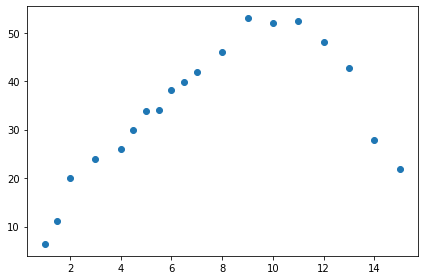

In [19]:
#GRAFICAMOS LOS DATOS
import matplotlib.pyplot as plt
plt.plot(conc,resis,'o')
plt.tight_layout()

Notamos que los datos no tienen un patron lineal, ajustamos una regresión polinomial de grado 2.

In [15]:
#IMPORTAMOS NumPy
import numpy as np
#AJUSTAMOS LOS DATOS A UN POLINOMIO DE GRADO 2
f = np.polyfit(Datos['Concentracion'],Datos.loc[:,'Resistencia'],2)
p = np.poly1d(f)
print(p)

         2
-0.6345 x + 11.76 x - 6.674


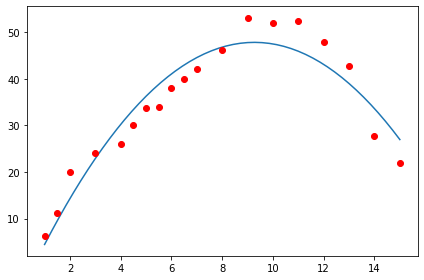

In [22]:
#GRAFICAMOS LOS DATOS Y LA ECUACION OBTENIDA

#GRAFICAMOS EL POLINOMIO
x_e = np.linspace(min(conc),max(conc))
plt.plot(x_e,-0.6345*(x_e**2)+11.76*x_e-6.674)

#GRAFICAMOS LOS PUNTOS
plt.plot(conc,resis,'o',color = 'red')
plt.tight_layout()

##ANOVA

Para el caso de la regresión lineal simple, el ANOVA provee una prueba de hipótesis planteado como:

$$H_0 : \beta_1 = 0$$
$$H_1 : \beta_1 \neq 0$$

Donde el estadístico de prueba es $F^*=\frac{MSR}{MSE}$ donde $F^*$ tiene distribución $F_{1,n-2}$. Rechazamos la hipótesis nula sí $F^*>F_{1-\alpha,1 ,n-2}$.

La prueba de hipótesis se puede entender como


$$H_0 : \text{La regresión no afecta significativamente}$$
$$H_1 : \text{La regresión afecta significativamente}$$


Para el caso de la regresión múltiple, el ANOVA provee la siguiente prueba de hipótesis.

$$H_0 : \beta_1 = \ldots = \beta_{p-1} = 0$$
$$H_1 : \beta_i \neq 0 \text{ para algún }i\in\{1,\ldots ,p-1\}$$

En este caso rechazar la hipótesis nula implica que la ecuación de regresión difiere de una constante, es decir, al menos una variable regresora es importante.

Estadísticamente el ANOVA tambíen nos proporciona otros datos que nos ayudan a determinar si rechazamos o no la hipótesis nula, tal es el caso del valor $F$ y el $p$-valor.

El valor $F$ **calcula el radio de variación entre la media de los grupos**, sobre la variación en cada uno de los grupos de muestra.

El $p$-valor **muestra si el resultado obtenido es estadísticamente significativo**.

Generalmente se compara el $p$-valor contra un $\alpha$ pequeño, de manera tradicional se toma un $\alpha = 0.05$ o $\alpha = 0.01$, donde sí $p$-valor es menor a $\alpha$ entonces rechazamos la hipótesis nula.

### ANOVA para un Análisis de Regresión Lineal

Para realizar el ANOVA en Regresión Lineal tenemos el siguiente código

```
#IMPORTAMOS
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

#AJUSTAMOS LOS DATOS
DF_fit = ols(formula='Y ~ X',data = DF).fit() 
#X REPRESENTA EL NOMBRE DE LA COLUMNA QUE CONTIENE LA VARIABLE INDEPENDIENTE
#Y REPRESENTA EL NOMBRE DE LA COLUMNA QUE CONTIENE LA VARIABLE DEPENDIENTE

#CREAMOS EL ANOVA
ANOVA = anova_lm(DF_fit)
#LA VARIABLE ANOVA ES UNA VARIABLE QUE CONTIENE UN DF DEL ANOVA
```


Para comparar el valor del Estadistico de Prueba con el Valor Crítico $F$ calculamos el valor crítico

```
#IMPORTAMOS
from scipy.stats import f as Valor_Critico_F

#ASIGNAMOS A UNA VARIABLE
Valor_Critico_DF = Valor_Critico_F.isf(Alpha,1,n-2)

#ALPHA ES LA PROBABILIDAD DESEADA, EJEM : 0.05 O 0.01
#n ES EL NUMERO DE FILAS DEL DATA FRAME
```


**EJEMPLO**

In [23]:
#RETOMANDO EL EJEMPLO DE REGRESION LINEAL
HGUD

,x,y
0,17.3,71.7
1,19.3,48.3
2,19.5,88.3
3,19.7,75.0
4,22.9,91.7
5,23.1,100.0
6,26.4,73.3
7,26.8,65.0
8,27.6,75.0
9,28.1,88.3


In [ ]:
#IMPORTAMOS
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
# AJUSTAMOS LOS DATOS
DF_fit = ols(formula='y ~ x',data = HGUD).fit() 
# TENEMOS EL ANOVA
ANOVA = anova_lm(DF_fit)

In [25]:
ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,735.135083,735.135083,4.168331,0.052819
Residual,23.0,4056.324917,176.361953,NaN,NaN


In [27]:
#COMPARAMOS EL ESTADISTICO DE PRUEBA CON EL VALOR CRITICO

#IMPORTAMOS EL VALOR CRITICO COMO Valor_Critico_F
from scipy.stats import f as Valor_Critico_F

#ASIGNAMOS A UNA VARIABLE
Valor_Critico_HGUD = Valor_Critico_F.isf(0.05,1,len(HGUD.index)-2) #PROBABILIDAD 0.05

if ANOVA.loc['x','F'] > Valor_Critico_HGUD:
  print('Rechazamos H0')
else:
  print('No rechazamos H0')

No rechazamos H0


Concluimos entonces que no existe una asociación lineal entre la variable dependiente y la variable independiente.

### ANOVA para un Análisis de Regresión Lineal Múltiple

Para realizar el ANOVA propio de un Análisis de Regresión Lineal Múltiple anexo el siguiente código que diseñé.

Estas funciones estan basadas en el libro «Applied Linear Statistical Models», quinta edición, de Kutner M., Nachtsheim C., Neter, J., Li, W.

In [29]:
def M_H (Data_X):
    '''
    Data_X : Es un DataFrame que contiene
             los valores de las variables independientes.
    '''
    import pandas as pd
    import numpy as np
    Transpuesta = Data_X.transpose()
    A_ = pd.DataFrame(np.dot(Transpuesta,Data_X))
    A = pd.DataFrame(np.linalg.inv(A_))
    return pd.DataFrame(np.dot(np.dot(Data_X,A),Transpuesta))
    
def SSTO (Data_Y):
    '''
    Data_Y : Es un DataFrame compuesto solamente por una columna
             que contiene las variables dependientes.
             
             En caso de usar el metodo iloc o loc para extraer
             la columna de las variables dependientes convierta
             dicha Serie en DataFrame mediante la funcion 'to_frame()'
             
             Ejemplo : DF.loc[:,'Y'].to_frame()
    '''
    import pandas as pd
    import numpy as np
    n = len(Data_Y.index)
    M_I = pd.DataFrame(np.diagflat(list(1 for i in range (n))))
    M_1 = pd.DataFrame(np.ones((n,n)))
    Transpuesta = Data_Y.transpose()
    A = M_I - (1/n)*M_1
    return float(np.dot(np.dot(Transpuesta,A),Data_Y))

def SSE (Data_X,Data_Y):
    '''
    Data_X : Es un DataFrame que contiene
             los valores de las variables independientes.
             
    Data_Y : Es un DataFrame compuesto solamente por una columna
             que contiene las variables dependientes.
             
             En caso de usar el metodo iloc o loc para extraer
             la columna de las variables dependientes convierta
             dicha Serie en DataFrame mediante la funcion 'to_frame()'
             
             Ejemplo : DF.loc[:,'Y'].to_frame()
    '''
    import pandas as pd
    import numpy as np
    H = M_H(Data_X)
    M_I = pd.DataFrame(np.diagflat(list(1 for i in range (len(H.index)))))
    Transpuesta = Data_Y.transpose()
    A = M_I - H
    return float(np.dot(np.dot(Transpuesta,A),Data_Y))

def SSR (Data_X,Data_Y):
    '''
    Data_X : Es un DataFrame que contiene
             los valores de las variables independientes.
             
    Data_Y : Es un DataFrame compuesto solamente por una columna
             que contiene las variables dependientes.
             
             En caso de usar el metodo iloc o loc para extraer
             la columna de las variables dependientes convierta
             dicha Serie en DataFrame mediante la funcion 'to_frame()'
             
             Ejemplo : DF.loc[:,'Y'].to_frame()
    '''
    import pandas as pd
    import numpy as np
    n = len(Data_Y.index)
    H = M_H(Data_X)
    M_1 = pd.DataFrame(np.ones((n,n)))
    Transpuesta = Data_Y.transpose()
    A = H - (1/n)*M_1
    return float(np.dot(np.dot(Transpuesta,A),Data_Y))
    
    
def ANOVA_RLM (Alpha,Data_X,Data_Y):
    '''
    Alpha : Es la probabilidad deseada.
    
    Data_X : Es un DataFrame que contiene
             los valores de las variables independientes.
             
    Data_Y : Es un DataFrame compuesto solamente por una columna
             que contiene las variables dependientes.
             
             En caso de usar el metodo iloc o loc para extraer
             la columna de las variables dependientes convierta
             dicha Serie en DataFrame mediante la funcion 'to_frame()'
             
             Ejemplo : DF.loc[:,'Y'].to_frame()
    '''
    from scipy.stats import f
    import pandas as pd
    import numpy as np
    Data_X['1'] = 1
    n = len(Data_Y.index)
    p_1 = len(Data_X.columns)-1
    n_p = (n-1)-p_1
    ssr = SSR(Data_X,Data_Y)
    sse = SSE(Data_X,Data_Y)
    ssto = SSTO(Data_Y)
    msr = ssr/p_1
    mse = sse/n_p
    Estadistico_Prueba = msr/mse
    Critico = f.isf(Alpha,p_1,n_p)
    return [pd.DataFrame({'SS':[ssr,sse,ssto],'GL':[p_1,n_p,n-1],
            'MS':[msr,mse,np.nan],
            'Estadistico de Prueba':[Estadistico_Prueba,np.nan,np.nan],
            'Valor Critico':[Critico,np.nan,np.nan]},index = ['Regresion','Error','Total']),
            Estadistico_Prueba>Critico]

**EJEMPLO**

Tomando el ejemplo de Análisis de Regresión Lineal Múltiple

In [30]:
DAED

,x_1,x_2,y
0,195,4.00,1004
1,255,4.00,1636
2,195,4.60,852
3,255,4.60,1506
4,255,4.20,1272
5,255,4.10,1270
6,255,4.60,1269
7,195,4.30,903
8,255,4.30,1555
9,255,4.00,1260


In [34]:
ANOVA_RLM(0.05,DAED.loc[:,['x_1','x_2']],DAED['y'].to_frame())[0] #IMPRIMIMOS EL ANOVA

,SS,GL,MS,Estadistico de Prueba,Valor Critico
Regresion,272481.462712,2,136240.731356,3.814269,3.982298
Error,392905.751574,11,35718.704689,NaN,NaN
Total,665387.214286,13,NaN,NaN,NaN


In [35]:
ANOVA_RLM(0.05,DAED.loc[:,['x_1','x_2']],DAED['y'].to_frame())[1] #DETERMINAMOS SI RECHAZAMOS H0

False

## Relación

Existen diversas maneras para medir hasta que punto las diferentes variables son interdependientes. Sí una variable esta relacionada con otra, es decir, por ejemplo,$x$ esta relacionada con $y$, entonces podemos analizar que tanto están relacionadas.

En particular, existen tres maneras de analizar la relación entre variables.

1. Visual
2. Coeficiente de Pearson
3. $p$-valor

Analizar la relación entre variables de **manera visual** nos da una **PISTA** de la relación entre ellas, sin embargo, no es prueba contundente de esta.

El **coeficiente de Pearson** es un valor estadístico que nos **indica que de que forma están relacionadas las variables**. El coeficiente de Pearson tiene el siguiente criterio.

|Valor del Coeficiente de Pearson|Significado|
|--|--|
|Cercano a 1|Tenemos una relación lineal positiva|
|Cercano a 0|No existe una relación lineal entre las variables|
|Cercano a -1|Tenemos una relación lineal negativa|

Por su lado, el **$p$-valor** nos dice **lo seguros que estamos de la relación calculada**.

|Valor del $p$-valor|Significado|
|:--:|--|
|$$0.01< p < 0.05$$|Fuerte certeza de relación lineal|
|$$0.05 < p < 0.1$$|Moderada certeza de relación lineal|
|$p < 0.1$|Débil certeza de relación lineal|
|$p > 0.1$|No existe relación lineal|

### Gráfica de dispersión

Para visualizar la gráfica de dispersión de un Análisis de Regresión Lineal tenemos el siguiente código.

```
#IMPORTAMOS
import matplotlib.pyplot as plt
import seaborn as sns

#GRAFICA
sns.regplot(x = 'Columna_de_las_X', y = 'Columna_de_las_Y', data = DF)
```


**EJEMPLO**

Ejercicio 11.9 del libro

In [36]:
V_C = [1.8,1.5,2,2.5,1.8,2.5,1.6,1.5]
C_P = [51,51,115,150,126,150,118,106]

E_119 = {'Volumen de cilindros (x)':V_C,'Caballos de potencia (y)':C_P}
E_119D = pd.DataFrame(E_119)

E_119D

,Volumen de cilindros (x),Caballos de potencia (y)
0,1.8,51
1,1.5,51
2,2.0,115
3,2.5,150
4,1.8,126
5,2.5,150
6,1.6,118
7,1.5,106


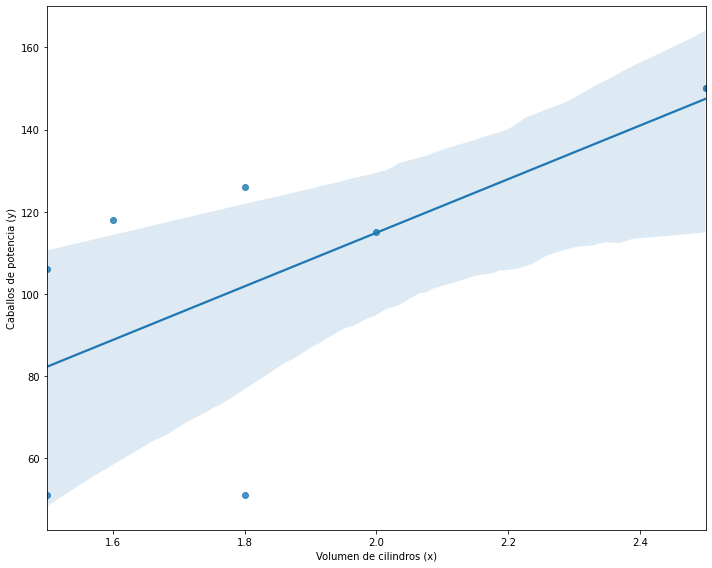

In [43]:
#IMPORTAMOS
import seaborn as sns
#GRAFICAMOS
plt.figure(figsize=(10,8))
sns.regplot( x = 'Volumen de cilindros (x)', y = 'Caballos de potencia (y)', data = E_119D) #SI QUEREMOS UN INTERVALO DE CONFIANZA MENOR O MAYOR HACER ci = Numero
plt.tight_layout()

###Coeficiente de Pearson y $p$-valor

Para obtener el coeficiente de Pearson y el $p$-valor tenemos el siguiente código.

```
#IMPORTAMOS
from scipy import stats

#LLAMAMOS A pearsonr
Pearson = stats.pearsonr(DF['COLUMNA_X'], DF['COLUMNA_Y'])

#PEARSON
Pearson[0]

#P-VALOR
Pearson[1]
```


**EJEMPLO**

Analizamos el coeficiente de Pearson y el $p$-valor al ejemplo anterior

In [44]:
#IMPORTAMOS 
from scipy import stats

#LLAMAMOS A pearsonr

Pearson = stats.pearsonr(E_119D['Volumen de cilindros (x)'],E_119D['Caballos de potencia (y)'])

In [45]:
print('El coeficiente de Pearson es',Pearson[0])

El coeficiente de Pearson es 0.6849508020049901


In [46]:
#VERIFICAMOS QUE NOS DICE EL P-VALOR
if 0.01 < Pearson[1] and Pearson[1] < 0.05 :
  print('Fuerte certeza de relacion lineal')
elif 0.05 < Pearson[1] and Pearson[1] < 0.1 :
  print('Moderada certeza de relacion lineal')
elif Pearson[1] < 0.1:
  print('Debil certeza de relacion lineal')
elif Pearson[1] > 0.1:
  print('No existe certeza de relacion lineal')

Moderada certeza de relacion lineal


### Coeficiente de Determinación $R^2$

El coeficiente de determinación nos dice lo cerca que están los datos de la línea de regresión ajustada.

|Valor $R^2$|Significado|
|--|--|
|Valor cercano a 1|La línea de regresión es un buen ajuste a los datos|
|Valor cercano a 0|La línea de regresión no es un buen ajuste a los datos|

Sí el valor de $R^2$ es negativo puede deberse a un sobre ajuste de los datos.

Este coeficiente es aplicable a una regresión lineal, múltiple y polinómica, entre otras.

Para obtener el coeficiente de determinación en un Análisis de Regresión Lineal tenemos el siguiente código.

```
#IMPORTAMOS
from sklearn.linear_model import LinearRegression

#ASIGNAMOS A UNA VARIABLE LinearRegression
LR = LinearRegression()

#AJUSTAMOS
LR.fit(DF[['COLUMNA_X']], DF[['COLUMNA_Y']])

#COEFICIENTE DE DETERMINACION
LR.score(DF[['COLUMNA_X']], DF[['COLUMNA_Y']])
```


Para obtener el coeficiente de determinación en un Análisis de Regresión Lineal Múltiple tenemos el siguiente código

```
#IMPORTAMOS
from sklearn.linear_model import LinearRegression

#ASIGNAMOS A UNA VARIABLE LinearRegression
LR = LinearRegression()

#AJUSTAMOS
LR.fit(DF[['COLUMNA1','COLUMNA2',...,'COLUMNAK']], DF[['COLUMNA_Y']])

#COEFICIENTE DE DETERMINACION
LR.score(DF[['COLUMNA1','COLUMNA2',...,'COLUMNAK']], DF[['COLUMNA_Y']])
```


Para obtener el coeficiente de determinación en un Análisis de Regresión Polinomial tenemos el siguiente código

```
# PRIMERO IMPORTAMOS
 
import numpy as np
from sklearn.metrics import r2_score
 
# ESPECIFIMOS LAS X E Y
 
f = np.polyfit(DF['COLUMNAX'],DF['COLUMNAY'],Grado_Polinomico)
p = np.poly1d(f)
r_2 = r2_score(y,p(x))
```

La variable r_2 contiene el coeficiente de determinación.

**EJEMPLO**

In [47]:
#PARA EL EJEMPLO DADO EN COEFICIENTE DE PEARSON Y P-VALOR
E_119D

,Volumen de cilindros (x),Caballos de potencia (y)
0,1.8,51
1,1.5,51
2,2.0,115
3,2.5,150
4,1.8,126
5,2.5,150
6,1.6,118
7,1.5,106


In [49]:
# ASIGNAMOS A UNA VARIABLE LinearRegression
LR = LinearRegression()
 
# AJUSTAMOS
LR.fit(E_119D[['Volumen de cilindros (x)']], E_119D[['Caballos de potencia (y)']])
 
# COEFICIENTE DE DETERMINACION
LR.score(E_119D[['Volumen de cilindros (x)']], E_119D[['Caballos de potencia (y)']])

0.4691576011672793

In [50]:
#PARA EL EJEMPLO DE ANALISIS DE REGRESION LINEAL MULTIPLE
DAED

,x_1,x_2,y
0,195,4.00,1004
1,255,4.00,1636
2,195,4.60,852
3,255,4.60,1506
4,255,4.20,1272
5,255,4.10,1270
6,255,4.60,1269
7,195,4.30,903
8,255,4.30,1555
9,255,4.00,1260


In [51]:
# ASIGNAMOS A UNA VARIABLE LinearRegression
LR2 = LinearRegression()
 
# AJUSTAMOS
LR2.fit(DAED[['x_1','x_2']], DAED[['y']])
 
# COEFICIENTE DE DETERMINACION
LR2.score(DAED[['x_1','x_2']], DAED[['y']])

0.4095081132638743

In [52]:
#PARA EL EJEMPLO DE ANALISIS DE REGRESION POLINOMIAL
Datos

,Concentracion,Resistencia
0,1.0,6.3
1,1.5,11.1
2,2.0,20.0
3,3.0,24.0
4,4.0,26.1
5,4.5,30.0
6,5.0,33.8
7,5.5,34.0
8,6.0,38.1
9,6.5,39.9


In [56]:
# PRIMERO IMPORTAMOS
 
import numpy as np
from sklearn.metrics import r2_score
 
# ESPECIFIMOS LAS X E Y
 
f = np.polyfit(Datos['Concentracion'],Datos['Resistencia'],2)
p = np.poly1d(f)
r2_score(Datos['Resistencia'],p(Datos['Concentracion'])) #EL PRIMER ARGUMENTO ES LA COLUMNA X Y EL SEGUNDO ES LA VARIABLE p EVALUADA EN LA COLUMNA Y

0.9085019647037846